In [15]:
import numpy as np
import numpy.random as rd
import sys
import matplotlib.pyplot as plt

dataset_num = 100
variance = 0.5
wtflag = 0
learning_rate = 0.4
file_exist = False

batch = 100
epochs = 300


'''learning_rate = 0.4
file_exist = False

batch = 100
epochs = 300'''

# making dataset

d_set = np.empty((1, 3), dtype=float)
if file_exist:
    tmp = np.load(sys.argv[1])
    d_set = np.append(d_set, tmp)
else:
    prob = rd.randint(0, 8, dataset_num)
    for i in prob:
        '''x = rd.normal(int(i/2)*2-1, variance)
        y = rd.normal(int(i/4)*2-1, variance)
        z = rd.normal(int(i/8)*2-1, variance)'''

        '''x = rd.normal(int(i / 2) * 2 - 1, variance)
        y = rd.normal(int(i / 4) * 2 - 1, variance)'''
        x = rd.randint(0, 2)
        y = rd.randint(0, 2)
        rst = x | y
        d_set = np.append(d_set, [[x, y, rst]], axis=0)
    if wtflag == 1:
        np.save('dataset.npy', d_set)
d_set = np.delete(d_set, 0, 0)


In [16]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def SGD_single_Layer(x, w, node_num=1, bias=True, learning_rate = 0.01, ftn = 'sigmoid', mode='train' ):
    # add bias
    if bias == True:
        x = np.hstack((np.ones((x.shape[0], 1)), x))
        
    #forwarding
    a = np.dot(x[:, 0:-1] , w.T)
    y_ = sigmoid(a)
    E = np.sum((y_ + x[:, -1])**2) / d_set.shape[0]
    
    #backpropagation delta
    delta = np.sum(y_ - x[:, -1]) / d_set.shape[0] *y_*(1-y_)
    #delta * x
    w_grad = np.array([x[i, 0:-1]*delta[i] for i in range(x.shape[0])])

    correct = 0
    #weight update
    if mode is 'train':
        w = w - np.sum(w_grad, axis=0)*learning_rate
        return w, delta, E, y_
    
    #probable calculate
    elif mode is 'test':
        cnt = np.array(x[:, -1] < np.average(x[:, -1]))
        correct = np.sum(cnt)/x.shape[0]*100
        return w, correct, E, y_
    

In [17]:
def multiple_Layer(x, w = [], num_of_hidden_node=5, bias=True, learning_rate = 0.01, ftn = 'sigmoid', mode='train' ):
    # add bias
    if bias == True:
        x = np.hstack((np.ones((x.shape[0], 1)), x))
        
    #initialize weight
    if w.size is 0:
        w = np.array([rd.normal(0, 1, (x.shape[1]-1)*num_of_hidden_node).reshape],[rd.normal(0,1,num_of_hidden_node)])
    
        
    #forwarding
    a = np.dot(x[:, 0:-1] , w.T)
    y_ = sigmoid(a)
    E = np.sum((y_ - x[:, -1])**2) / d_set.shape[0]
    
    #backpropagation delta
    delta = np.sum(y_ - x[:, -1]) / d_set.shape[0] *y_*(1-y_)
    #delta * x
    w_grad = np.array([x[i, 0:-1]*delta[i] for i in range(x.shape[0])])

    correct = 0
    #weight update
    if mode is 'train':
        w = w + np.sum(w_grad, axis=0)*learning_rate
        return w, delta, E
    
    #probable calculate
    elif mode is 'test':
        cnt = np.array(np.abs(y_ - x[:, -1]) < 0.5)
        print(cnt)
        correct = np.sum(cnt)/x.shape[0]*100
        return w, correct, E

data y : 
[1. 1. 1.]
 prediction y : 
[0.73666296 0.73666296 0.73666296 0.96630029 0.73736011 0.73666296
 0.96630029 0.73736011 0.73736011 0.96630029 0.73666296 0.73666296
 0.96618297 0.96618297 0.96618297 0.96618297 0.96618297 0.96630029
 0.96630029 0.73736011 0.73736011 0.96630029 0.96630029 0.73666296
 0.96630029 0.96618297 0.73736011 0.96618297 0.96630029 0.96630029
 0.73736011 0.73736011 0.96630029 0.96630029 0.96618297 0.96618297
 0.73736011 0.96618297 0.96618297 0.73666296 0.96630029 0.73736011
 0.96630029 0.96630029 0.96618297 0.96618297 0.73736011 0.96618297
 0.96618297 0.73666296 0.73736011 0.96630029 0.73736011 0.96618297
 0.96630029 0.73736011 0.96618297 0.73666296 0.73666296 0.96618297
 0.96630029 0.96618297 0.96618297 0.96630029 0.96630029 0.73666296
 0.96630029 0.73736011 0.96630029 0.73666296 0.73736011 0.96630029
 0.96618297 0.96618297 0.73666296 0.96618297 0.73736011 0.96630029
 0.73666296 0.73736011 0.73736011 0.96618297 0.96630029 0.96618297
 0.73736011 0.73736011 0

data y : 
[1. 0. 1.]
 prediction y : 
[0.66916455 0.66916455 0.66916455 0.94177132 0.62821289 0.66916455
 0.94177132 0.62821289 0.62821289 0.94177132 0.66916455 0.66916455
 0.95088533 0.95088533 0.95088533 0.95088533 0.95088533 0.94177132
 0.94177132 0.62821289 0.62821289 0.94177132 0.94177132 0.66916455
 0.94177132 0.95088533 0.62821289 0.95088533 0.94177132 0.94177132
 0.62821289 0.62821289 0.94177132 0.94177132 0.95088533 0.95088533
 0.62821289 0.95088533 0.95088533 0.66916455 0.94177132 0.62821289
 0.94177132 0.94177132 0.95088533 0.95088533 0.62821289 0.95088533
 0.95088533 0.66916455 0.62821289 0.94177132 0.62821289 0.95088533
 0.94177132 0.62821289 0.95088533 0.66916455 0.66916455 0.95088533
 0.94177132 0.95088533 0.95088533 0.94177132 0.94177132 0.66916455
 0.94177132 0.62821289 0.94177132 0.66916455 0.62821289 0.94177132
 0.95088533 0.95088533 0.66916455 0.95088533 0.62821289 0.94177132
 0.66916455 0.62821289 0.62821289 0.95088533 0.94177132 0.95088533
 0.62821289 0.62821289 0


2.9137 : train cost, 2.9181 : test cost, 18.81188118811881 : correction
data y : 
[1. 0. 1.]
 prediction y : 
[0.66916455 0.66916455 0.66916455 0.94177132 0.62821289 0.66916455
 0.94177132 0.62821289 0.62821289 0.94177132 0.66916455 0.66916455
 0.95088533 0.95088533 0.95088533 0.95088533 0.95088533 0.94177132
 0.94177132 0.62821289 0.62821289 0.94177132 0.94177132 0.66916455
 0.94177132 0.95088533 0.62821289 0.95088533 0.94177132 0.94177132
 0.62821289 0.62821289 0.94177132 0.94177132 0.95088533 0.95088533
 0.62821289 0.95088533 0.95088533 0.66916455 0.94177132 0.62821289
 0.94177132 0.94177132 0.95088533 0.95088533 0.62821289 0.95088533
 0.95088533 0.66916455 0.62821289 0.94177132 0.62821289 0.95088533
 0.94177132 0.62821289 0.95088533 0.66916455 0.66916455 0.95088533
 0.94177132 0.95088533 0.95088533 0.94177132 0.94177132 0.66916455
 0.94177132 0.62821289 0.94177132 0.66916455 0.62821289 0.94177132
 0.95088533 0.95088533 0.66916455 0.95088533 0.62821289 0.94177132
 0.66916455 0.6282

data y : 
[0. 0. 0.]
 prediction y : 
[0.66916455 0.66916455 0.66916455 0.94177132 0.62821289 0.66916455
 0.94177132 0.62821289 0.62821289 0.94177132 0.66916455 0.66916455
 0.95088533 0.95088533 0.95088533 0.95088533 0.95088533 0.94177132
 0.94177132 0.62821289 0.62821289 0.94177132 0.94177132 0.66916455
 0.94177132 0.95088533 0.62821289 0.95088533 0.94177132 0.94177132
 0.62821289 0.62821289 0.94177132 0.94177132 0.95088533 0.95088533
 0.62821289 0.95088533 0.95088533 0.66916455 0.94177132 0.62821289
 0.94177132 0.94177132 0.95088533 0.95088533 0.62821289 0.95088533
 0.95088533 0.66916455 0.62821289 0.94177132 0.62821289 0.95088533
 0.94177132 0.62821289 0.95088533 0.66916455 0.66916455 0.95088533
 0.94177132 0.95088533 0.95088533 0.94177132 0.94177132 0.66916455
 0.94177132 0.62821289 0.94177132 0.66916455 0.62821289 0.94177132
 0.95088533 0.95088533 0.66916455 0.95088533 0.62821289 0.94177132
 0.66916455 0.62821289 0.62821289 0.95088533 0.94177132 0.95088533
 0.62821289 0.62821289 0

data y : 
[1. 1. 1.]
 prediction y : 
[0.66916455 0.66916455 0.66916455 0.94177132 0.62821289 0.66916455
 0.94177132 0.62821289 0.62821289 0.94177132 0.66916455 0.66916455
 0.95088533 0.95088533 0.95088533 0.95088533 0.95088533 0.94177132
 0.94177132 0.62821289 0.62821289 0.94177132 0.94177132 0.66916455
 0.94177132 0.95088533 0.62821289 0.95088533 0.94177132 0.94177132
 0.62821289 0.62821289 0.94177132 0.94177132 0.95088533 0.95088533
 0.62821289 0.95088533 0.95088533 0.66916455 0.94177132 0.62821289
 0.94177132 0.94177132 0.95088533 0.95088533 0.62821289 0.95088533
 0.95088533 0.66916455 0.62821289 0.94177132 0.62821289 0.95088533
 0.94177132 0.62821289 0.95088533 0.66916455 0.66916455 0.95088533
 0.94177132 0.95088533 0.95088533 0.94177132 0.94177132 0.66916455
 0.94177132 0.62821289 0.94177132 0.66916455 0.62821289 0.94177132
 0.95088533 0.95088533 0.66916455 0.95088533 0.62821289 0.94177132
 0.66916455 0.62821289 0.62821289 0.95088533 0.94177132 0.95088533
 0.62821289 0.62821289 0

2.9137 : train cost, 2.9517 : test cost, 17.82178217821782 : correction
data y : 
[1. 1. 1.]
 prediction y : 
[0.66916455 0.66916455 0.66916455 0.94177132 0.62821289 0.66916455
 0.94177132 0.62821289 0.62821289 0.94177132 0.66916455 0.66916455
 0.95088533 0.95088533 0.95088533 0.95088533 0.95088533 0.94177132
 0.94177132 0.62821289 0.62821289 0.94177132 0.94177132 0.66916455
 0.94177132 0.95088533 0.62821289 0.95088533 0.94177132 0.94177132
 0.62821289 0.62821289 0.94177132 0.94177132 0.95088533 0.95088533
 0.62821289 0.95088533 0.95088533 0.66916455 0.94177132 0.62821289
 0.94177132 0.94177132 0.95088533 0.95088533 0.62821289 0.95088533
 0.95088533 0.66916455 0.62821289 0.94177132 0.62821289 0.95088533
 0.94177132 0.62821289 0.95088533 0.66916455 0.66916455 0.95088533
 0.94177132 0.95088533 0.95088533 0.94177132 0.94177132 0.66916455
 0.94177132 0.62821289 0.94177132 0.66916455 0.62821289 0.94177132
 0.95088533 0.95088533 0.66916455 0.95088533 0.62821289 0.94177132
 0.66916455 0.62821

data y : 
[1. 1. 1.]
 prediction y : 
[0.66916455 0.66916455 0.66916455 0.94177132 0.62821289 0.66916455
 0.94177132 0.62821289 0.62821289 0.94177132 0.66916455 0.66916455
 0.95088533 0.95088533 0.95088533 0.95088533 0.95088533 0.94177132
 0.94177132 0.62821289 0.62821289 0.94177132 0.94177132 0.66916455
 0.94177132 0.95088533 0.62821289 0.95088533 0.94177132 0.94177132
 0.62821289 0.62821289 0.94177132 0.94177132 0.95088533 0.95088533
 0.62821289 0.95088533 0.95088533 0.66916455 0.94177132 0.62821289
 0.94177132 0.94177132 0.95088533 0.95088533 0.62821289 0.95088533
 0.95088533 0.66916455 0.62821289 0.94177132 0.62821289 0.95088533
 0.94177132 0.62821289 0.95088533 0.66916455 0.66916455 0.95088533
 0.94177132 0.95088533 0.95088533 0.94177132 0.94177132 0.66916455
 0.94177132 0.62821289 0.94177132 0.66916455 0.62821289 0.94177132
 0.95088533 0.95088533 0.66916455 0.95088533 0.62821289 0.94177132
 0.66916455 0.62821289 0.62821289 0.95088533 0.94177132 0.95088533
 0.62821289 0.62821289 0


2.9137 : train cost, 2.9402 : test cost, 17.82178217821782 : correction
data y : 
[0. 0. 0.]
 prediction y : 
[0.66916455 0.66916455 0.66916455 0.94177132 0.62821289 0.66916455
 0.94177132 0.62821289 0.62821289 0.94177132 0.66916455 0.66916455
 0.95088533 0.95088533 0.95088533 0.95088533 0.95088533 0.94177132
 0.94177132 0.62821289 0.62821289 0.94177132 0.94177132 0.66916455
 0.94177132 0.95088533 0.62821289 0.95088533 0.94177132 0.94177132
 0.62821289 0.62821289 0.94177132 0.94177132 0.95088533 0.95088533
 0.62821289 0.95088533 0.95088533 0.66916455 0.94177132 0.62821289
 0.94177132 0.94177132 0.95088533 0.95088533 0.62821289 0.95088533
 0.95088533 0.66916455 0.62821289 0.94177132 0.62821289 0.95088533
 0.94177132 0.62821289 0.95088533 0.66916455 0.66916455 0.95088533
 0.94177132 0.95088533 0.95088533 0.94177132 0.94177132 0.66916455
 0.94177132 0.62821289 0.94177132 0.66916455 0.62821289 0.94177132
 0.95088533 0.95088533 0.66916455 0.95088533 0.62821289 0.94177132
 0.66916455 0.6282

data y : 
[0. 0. 0.]
 prediction y : 
[0.66916455 0.66916455 0.66916455 0.94177132 0.62821289 0.66916455
 0.94177132 0.62821289 0.62821289 0.94177132 0.66916455 0.66916455
 0.95088533 0.95088533 0.95088533 0.95088533 0.95088533 0.94177132
 0.94177132 0.62821289 0.62821289 0.94177132 0.94177132 0.66916455
 0.94177132 0.95088533 0.62821289 0.95088533 0.94177132 0.94177132
 0.62821289 0.62821289 0.94177132 0.94177132 0.95088533 0.95088533
 0.62821289 0.95088533 0.95088533 0.66916455 0.94177132 0.62821289
 0.94177132 0.94177132 0.95088533 0.95088533 0.62821289 0.95088533
 0.95088533 0.66916455 0.62821289 0.94177132 0.62821289 0.95088533
 0.94177132 0.62821289 0.95088533 0.66916455 0.66916455 0.95088533
 0.94177132 0.95088533 0.95088533 0.94177132 0.94177132 0.66916455
 0.94177132 0.62821289 0.94177132 0.66916455 0.62821289 0.94177132
 0.95088533 0.95088533 0.66916455 0.95088533 0.62821289 0.94177132
 0.66916455 0.62821289 0.62821289 0.95088533 0.94177132 0.95088533
 0.62821289 0.62821289 0

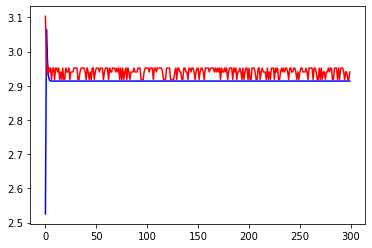

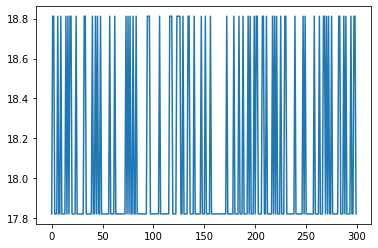

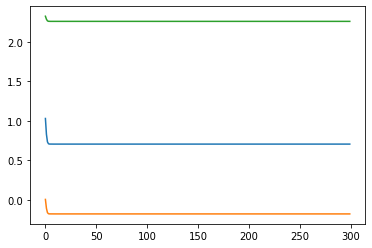

In [18]:
def train(x):
    # initialize weight
    train_hist_E = []
    test_hist_E = []
    correct_hist = []
    w_hist = []
    test_y_hist = []
    
    b = rd.normal(1, 1, 3)

    for i in range(epochs):
        #train run!
        b, delta, E, y_ = SGD_single_Layer(d_set, b, learning_rate = learning_rate)
        train_hist_E.append(E)
        w_hist.append(b)
        
        #making test_set
        test_set = np.empty((1, 3))
        prob = rd.randint(0, 8, dataset_num)
        for i in prob:
            '''x = rd.normal(int(i/2)*2-1, variance)
            y = rd.normal(int(i/4)*2-1, variance)
            z = rd.normal(int(i/8)*2-1, variance)'''
            x = rd.randint(0, 2)
            y = rd.randint(0, 2)
            rst = x | y
            test_set = np.append(d_set, [[x, y, rst]], axis=0)

        #test run!
        test_b, correction, test_E, y_ =SGD_single_Layer(test_set, b, mode='test')
        test_hist_E.append(test_E)
        correct_hist.append(correction)
        test_y_hist.append(y_)
        
        print(f"data y : \n{test_set[-1]}\n prediction y : \n{y_}\n\n")
        #print
        print(f'{E:.5} : train cost, {test_E:.5} : test cost, {correction} : correction')

    plt.figure()
    plt.plot(train_hist_E, 'b')
    plt.plot(test_hist_E, 'r')
    plt.show()

    plt.figure()
    plt.plot(correct_hist)
    plt.show()
    
    plt.figure()
    plt.plot(w_hist)
    plt.show()
train(1)